<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Practice_KNN_Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, model_selection, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Step #1: Load the data**

In [34]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


**Step #2: Decide independent and dependent variables**

In [35]:
features = df[["mean radius","mean texture"]]
label      = df['TARGET']

Before we continue our steps, let's visualize our data.

Since we are building a classifier, it can be useful to look at some of the variables. Below we will look at "mean radius" and "mean texture" and see if there appears to be a correlation with the detection of cancer.

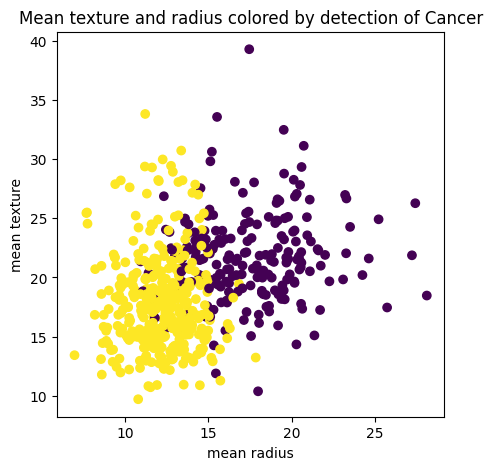

In [36]:
plt.figure(figsize=(5,5))
scatter = plt.scatter(features['mean radius'], features['mean texture'], c=label)
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

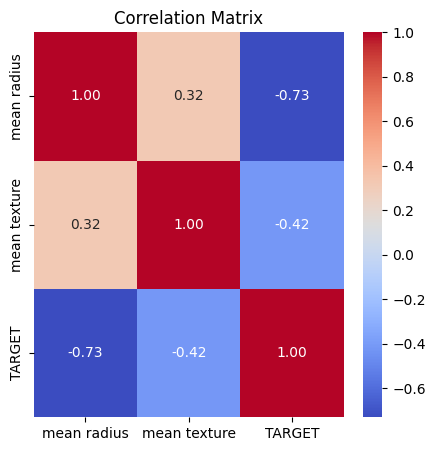

In [37]:
df1 = df[["mean radius","mean texture","TARGET"]]

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(5,5))

# Create a heatmap with numbers formatted as '.2f'
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

The StandardScaler function in scikit-learn is used for standardizing the features of a dataset. **'Standardization is an important preprocessing step in machine learning that transforms the data so that it has a mean of 0 and a standard deviation of 1. '**

Here's how the StandardScaler function works:

1. Calculate the mean (average) and standard deviation of each feature in the training data.
2. Subtract the mean from each feature value.
3. Divide each resulting value by the standard deviation.

In [39]:
# Initialize the KNN classifier
k = 4  # Number of neighbors to consider
model = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

In [40]:
# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9035


In [41]:
# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

Confusion Matrix:
 [[40  3]
 [ 8 63]]


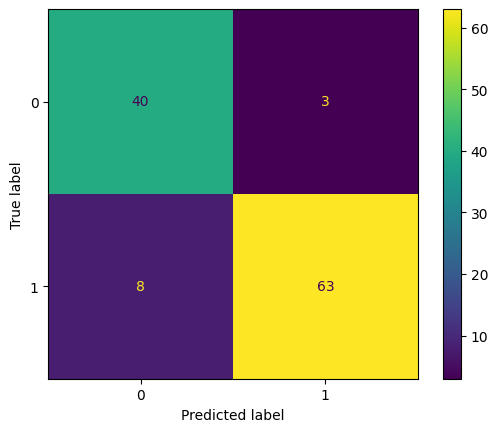

In [42]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

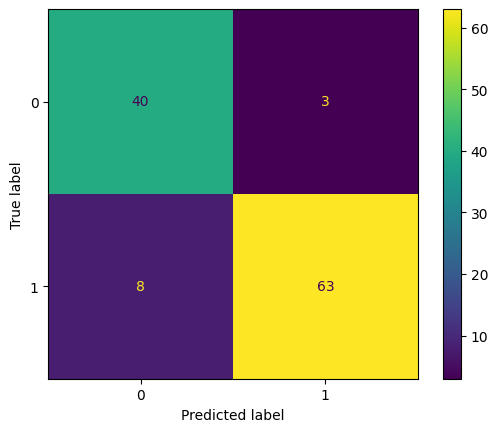

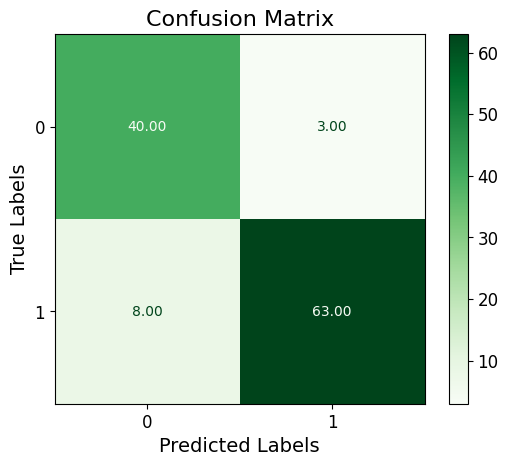

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming model, X_test, and y_test are defined
confusion_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# Customize the display
confusion_display.plot(cmap=plt.cm.Greens, values_format='.2f')

# Customize font size of the labels and values
confusion_display.ax_.set_title('Confusion Matrix', fontsize=16)
confusion_display.im_.colorbar.ax.tick_params(labelsize=12)  # Adjust colorbar font size
confusion_display.ax_.set_xlabel('Predicted Labels', fontsize=14)
confusion_display.ax_.set_ylabel('True Labels', fontsize=14)
confusion_display.ax_.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label font size

plt.show()

In [44]:
# Save the confusion matrix plot as an image file
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # Adjust filename and settings as needed

<Figure size 640x480 with 0 Axes>

**Use the model**

Predict whether the following patients have cancer or not:

Is a patient with mean radius 15.5 and mean texture 31.2 likely to have cancer?

Is a patient with mean radius 12.2 and mean texture 34.5 likely to have cancer?

In [47]:
import pandas as pd

# Create a dictionary with the test patient data
test_patients = {
    'mean radius': [15.5, 12.2],
    'mean texture': [31.2, 34.5]
}

# Create a DataFrame from the dictionary
test_patients_df = pd.DataFrame(test_patients)

# Display the DataFrame
test_patients_df


,mean radius,mean texture
0,15.5,31.2
1,12.2,34.5


In [50]:
prediction = model.predict(test_patients_df)

# Add the prediction results to the DataFrame
test_patients_df['prediction'] = prediction

# Display the DataFrame
test_patients_df

,mean radius,mean texture,prediction
0,15.5,31.2,0
1,12.2,34.5,1
